# Ensemble Learning (Bagging, Stacking, dan Random Forest Classification) dan Grid Search
Ensemble Learning adalah algoritma dalam pembelajaran mesin (machine learning) dimana algoritma ini sebagai pencarian solusi prediksi terbaik dibandingkan dengan algoritma yang lain karena metode ensemble ini menggunakan beberapa algoritma pembelajaran untuk pencapaian solusi prediksi yang lebih baik daripada algoritma yang bisa diperoleh dari salah satu pembelajaran algoritma kosituen saja. Tidak seperti ansamble statistika didalam mekanika statistika biasanya selalu tak terbatas. Ansemble Pembelajaran hanya terdiri dari seperangkat model alternatif yang bersifat terbatas, namun biasanya memungkinkan untuk menjadi lebih banyak lagi struktur fleksibel yang ada diantara alternatif model itu sendiri.<br>
Evaluasi prediksi dari ensemble biasanya memerlukan banyak komputasi daripada evaluasi prediksi model tunggal (single model), jadi ensemble ini memungkinkan untuk mengimbangi poor learning algorithms oleh performasi lebih dari komputasi itu. Terdapat beberapa metode ensemble learning yaitu bagging, stacking dan random forest classification. Dan pada content kali ini akan membahas metode metode tersebut dengan melakukan tahapan-tahapan berikut.

## **Praprepocessing Text**
Proses ini merupakan proses awal sebelum melakukan proses prepocessing text, yaitu proses untuk mendapatkan dataset yang akan digunakan untuk proses prepocessing, yang mana dataset yang akan digunakan diambil dari website dengan melakukan crawling pada website.

### Crawling Tweeter

Crawling merupakan suatu proses pengambilan data dengan menggunakan mesin yang dilakukan secara online. Proses ini dilakukan untuk mengimpor data yang ditemukan kedalam file lokal komputer. Kemudian data yang telah di impor tersebut akan dilakukan tahap prepocessing text. Pada proses crawling kali ini dilakukan crawling data pada twitter dengan menggunakan tools Twint.







#### Installasi Twint
Twint merupakan sebuah tools yang digunakan untuk dapat melakukan scraping data dari media sosial yaitu twitter dengan menggunakan bahasa pemrograman python. Twint dapat dijalankan tanpa harus menggunakan API twitter itu sendiri, namun kapasitas scrapingnya dibatasi sebanyak 3200 tweet.

Twint tidak hanya digunakan untuk mengambil data tweet, twint juga bisa digunakan untuk mengambil data user, follower, retweet, dan sejenisnya. Twint memanfaatkan operator pencarian twitter yang digunakan untuk memilih dan memilah informasi yang sensitif, termasuk email dan nomor telepon di dalamnya.

Proses installasi Twint dapat dilakukan dengan source code berikut.

In [ ]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 263 kB 7.0 MB/s 
     |████████████████████████████████| 385 kB 41.4 MB/s 
     |████████████████████████████████| 288 kB 38.9 MB/s 
     |█████████████████████████

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install aiohttp==3.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.0 MB/s 
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.2
    Uninstalling async-timeout-4.0.2:
      Successfully uninstalled async-timeout-4.0.2
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.3
    Uninstalling aiohttp-3.8.3:
      Successfully uninstalled aiohttp-3.8.3


#### Scraping Data Tweeter
Setelah proses installasi Twint berhasil selanjutnya lakukan scraping data tweeter. Scraping sendiri merupakan proses pengambilan data dari website. Untuk melakukan proses scraping data dari tweeter, tinggal import twint untuk melakukan scraping data tweeter dengan tweet yang mengandung kata "#rockygerung" dengan limit 100 menggunakan source code berikut.

In [ ]:
import nest_asyncio
nest_asyncio.apply() #digunakan sekali untuk mengaktifkan tindakan serentak dalam notebook jupyter.
import twint #untuk import twint
c = twint.Config()
c.Search = '#rockygerung'
c.Lang = "in"
c.Pandas = True
c.Limit = 100
twint.run.Search(c)

1590933496121688064 2022-11-11 05:04:38 +0000 <rockygerungcom> Quote:  Negeri yang memburuk karena dikelola manajemen benda mati: kerja, kerja, kerja.  | #negeri | #rockygerungcom | #rockygerung
1590931427251539968 2022-11-11 04:56:24 +0000 <fajaronline> Ketum Projo Temui Prabowo Usai Jokowi Berikan Sinyal Dukungan, Rocky Gerung: Ngapain, Mestinya Bubar Aja  https://t.co/NUtPTVPwVJ #BudiArieSetiadi #PrabowoSubianto #Projo #RockyGerung
1590872156975804416 2022-11-11 01:00:53 +0000 <fajaronline> Puan dan Mega ke Itaewon, Tragedi Kanjuruhan Tak Pernah Dikunjungi, Rocky Gerung: Ini Soal Standar Pemimpin  https://t.co/38Dhy63g42 #Itaewon #Kanjuruhan #PuanMaharani #RockyGerung
1590652396832976897 2022-11-10 10:27:38 +0000 <Rgtvchannel_id> #RockyGerung #PoliticsAndBeyond #IndonesiaBerpikir #FasliJalal
1590636648638750720 2022-11-10 09:25:04 +0000 <jpnncom> Rocky Gerung mengusulkan Anies Baswedan menjadikan Gibran sebagai cawapres. Begini respons Gibran, putra Presiden Jokowi, itu. #RockyGerun

#### Ambil Tweet
Setelah proses crawling didapatkan data tweeter diatas, pada data tersebut terdapat data yang tidak diperlukan. Untuk melakukan prepocessing hanya memerlukan data tweet dari user, maka dari itu buang data yang tidak diperlukan dan ambil data tweet yang akan digunakan dengan source code berikut. 

In [ ]:
Tweets_dfs = twint.storage.panda.Tweets_df
Tweets_dfs["tweet"]

0     Quote:  Negeri yang memburuk karena dikelola m...
1     Ketum Projo Temui Prabowo Usai Jokowi Berikan ...
2     Puan dan Mega ke Itaewon, Tragedi Kanjuruhan T...
3     #RockyGerung #PoliticsAndBeyond #IndonesiaBerp...
4     Rocky Gerung mengusulkan Anies Baswedan menjad...
5     10 November. Ada yang harus dikenang, ada yang...
6     Rocky Gerung Usulkan Luhut Pandjaitan Jadi Caw...
7     Mantan Ajudan Mengubah Kesaksian di Sidang, Ak...
8     #RockyGerung #PoliticsAndBeyond #IndonesiaBerp...
9     Quote:  Memaki boleh.  Tapi jangan cuma itu ke...
10    Rocky Gerung Puji Buzzer Demokrat Pintar-pinta...
11    Banyak kisah Rhoma Irama di masa lalu terbongk...
12    #RockyGerung #RockyGerungOfficial #PoliticsAnd...
13    Rhoma : "Di dalam negara demokrasi itu harus a...
14    Banyak jalan menuju Rhoma Bila engkau gagal di...
15    Politik Identitas adalah suatu gerakan politik...
16    Populisme Agama adalah suatu pendekatan politi...
17    #RockyGerung #RockyGerungOfficial #Politic

### Upload Data Tweet
Setelah data tweet di dapatkan, simpan data tweet tersebut dalam bentuk csv, kemudian download dan upload ke github untuk nanti digunakan sebagai dataset dari proses prepocessing text.

In [ ]:
Tweets_dfs["tweet"].to_csv("RG.csv",index=False)

## **Prepocessing Text** 

Setelah proses crawling, selanjutnya dilakukan prepocessing text, yaitu sebuah proses mesin yang digunakan untuk menyeleksi data teks agar lebih terstruktur dengan melalui beberapa tahapan-tahapan yang meliputi tahapan case folding, tokenizing, filtering dan stemming. 
Sebelum melakukan tahapan-tahapan tersebut, terlebih dahulu kita import data crawling yang diupload ke github tadi dengan menggunakan library pandas pada source code berikut.



In [ ]:
import pandas as pd 

tweets = pd.read_csv("https://raw.githubusercontent.com/Fahrur190125/Data/main/RG.csv",index_col=False)
tweets

,tweet
0,Anies itu Penantang 👈👉 said #RockyGerung ht...
1,#RockyGerung #RGTVChannelid #PolitcsAndBeyond ...
2,KODE DARI OPUNG LUHUT!! Tidak mau jadi calon ...
3,Rocky Gerung Bicara Soal Keberlangsungan Pemer...
4,#RockyGerung #RGTVChannelid #PolitcsAndBeyond ...
...,...
95,Jaman REZIM SKRG kaya bapa tiri di sinetron......
96,Sobat akal sehat nantikan video part 2 yang ak...
97,Menteri Koordinator bidang Kemaritiman dan Inv...
98,PEMBODOHAN YANG BERLANGSUNG DALAM KURIKULUM ET...


Setelah data crawling berhasil di import, selanjutnya lakukan tahapan-tahapan prepocessing seperti berikut.

### Case Folding
Setelah berhassil mengambil dataset, selanjutnya ke proses prepocessing ke tahapan case folding yaitu tahapan pertama untuk melakukan prepocessing text dengan mengubah text menjadi huruf kecil semua dengan menghilangkan juga karakter spesial, angka, tanda baca, spasi serta huruf yang tidak penting.



#### Merubah Huruf Kecil Semua
Tahapan case folding yang pertama yaitu merubah semua huruf menjadi huruf kecil semua menggunakan fungsi lower() dengan source code berikut.

In [ ]:
tweets['tweet'] = tweets['tweet'].str.lower()


tweets['tweet']

0     anies itu penantang 👈👉 said #rockygerung    ht...
1     #rockygerung #rgtvchannelid #politcsandbeyond ...
2     kode dari opung luhut!!  tidak mau jadi calon ...
3     rocky gerung bicara soal keberlangsungan pemer...
4     #rockygerung #rgtvchannelid #politcsandbeyond ...
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron......
96    sobat akal sehat nantikan video part 2 yang ak...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky?!  saksikan selengkap...
Name: tweet, Length: 100, dtype: object

#### Menghapus Karakter Spesial
Tahapan case folding selanjutnya ialah menghapus karakter spesial dengan menggunakan library nltk, untuk menggunakan librarynya terlebih dahulu install dengan source code berikut.


In [ ]:
#install library nltk
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Setelah library nltk terinstall kita import librarynya dan buat sebuah function untuk menghapus karakter spesial tersebut.

In [ ]:
import string 
import re #regex library
# import word_tokenize & FreqDist from NLTK

from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


def remove_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('\\f'," ").replace('\\r'," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
tweets['tweet'] = tweets['tweet'].apply(remove_special)
tweets['tweet']

0                           anies itu penantang ?? said
1                                                      
2     kode dari opung luhut!! tidak mau jadi calon p...
3     rocky gerung bicara soal keberlangsungan pemer...
4                                                      
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron......
96    sobat akal sehat nantikan video part 2 yang ak...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky?! saksikan selengkapn...
Name: tweet, Length: 100, dtype: object

#### Menghapus Angka
Selanjutnya melakukan penghapusan angka, penghapusan angka disini fleksibel, jika angka ingin dijadikan fitur maka penghapusan angka tidak perlu dilakukan. Untuk data tweet ini saya tidak ingin menjadikan angka sebagai fitur, untuk itu dilakukan penghapusan angka dengan function berikut


In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

tweets['tweet'] = tweets['tweet'].apply(remove_number)
tweets['tweet']

0                           anies itu penantang ?? said
1                                                      
2     kode dari opung luhut!! tidak mau jadi calon p...
3     rocky gerung bicara soal keberlangsungan pemer...
4                                                      
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron......
96    sobat akal sehat nantikan video part  yang aka...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky?! saksikan selengkapn...
Name: tweet, Length: 100, dtype: object

#### Menghapus Tanda Baca
Selanjutnya penghapusan tanda baca yang tidak perlu yang dilakukan dengan function punctuation berikut


In [ ]:
#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

tweets['tweet'] = tweets['tweet'].apply(remove_punctuation)
tweets['tweet']

0                             anies itu penantang  said
1                                                      
2     kode dari opung luhut tidak mau jadi calon pre...
3     rocky gerung bicara soal keberlangsungan pemer...
4                                                      
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron di...
96    sobat akal sehat nantikan video part  yang aka...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky saksikan selengkapnya...
Name: tweet, Length: 100, dtype: object

#### Menghapus Spasi
Selanjutnya melakukan penghapusan spasi dengab menggunakan function berikut


In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_LT)


#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

tweets['tweet'] = tweets['tweet'].apply(remove_whitespace_multiple)
tweets['tweet']

0                              anies itu penantang said
1                                                      
2     kode dari opung luhut tidak mau jadi calon pre...
3     rocky gerung bicara soal keberlangsungan pemer...
4                                                      
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron di...
96    sobat akal sehat nantikan video part yang akan...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky saksikan selengkapnya...
Name: tweet, Length: 100, dtype: object

#### Menghapus Huruf
Selanjutnya melakukan penghapusan huruf yang tidak bermakna dengan function berikut

In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

tweets['tweet'] = tweets['tweet'].apply(remove_singl_char)
tweets['tweet']

0                              anies itu penantang said
1                                                      
2     kode dari opung luhut tidak mau jadi calon pre...
3     rocky gerung bicara soal keberlangsungan pemer...
4                                                      
                            ...                        
95    jaman rezim skrg kaya bapa tiri di sinetron di...
96    sobat akal sehat nantikan video part yang akan...
97    menteri koordinator bidang kemaritiman dan inv...
98    pembodohan yang berlangsung dalam kurikulum et...
99    setuju dengan bung rocky saksikan selengkapnya...
Name: tweet, Length: 100, dtype: object

### Tokenizing
Setelah tahapan case folding selesai, selanjutnya masuk ke tahapan tokenizing yang merupakan tahapan prepocessing yang memecah kalimat dari text menjadi kata agar membedakan antara kata pemisah atau bukan. Untuk melakukan tokenizing dapat menggunakan dengan library nltk dan function berikut.



In [ ]:
import nltk
nltk.download('punkt')
# NLTK word Tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# NLTK word Tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweets['tweet'] = tweets['tweet'].apply(word_tokenize_wrapper)
tweets['tweet']

0                         [anies, itu, penantang, said]
1                                                    []
2     [kode, dari, opung, luhut, tidak, mau, jadi, c...
3     [rocky, gerung, bicara, soal, keberlangsungan,...
4                                                    []
                            ...                        
95    [jaman, rezim, skrg, kaya, bapa, tiri, di, sin...
96    [sobat, akal, sehat, nantikan, video, part, ya...
97    [menteri, koordinator, bidang, kemaritiman, da...
98    [pembodohan, yang, berlangsung, dalam, kurikul...
99    [setuju, dengan, bung, rocky, saksikan, seleng...
Name: tweet, Length: 100, dtype: object

### Filtering(Stopword)
Tahapan prepocessing selanjutnya ialah filtering atau disebut juga stopword yang merupakan lanjutan dari tahapan tokenizing yang digunakan untuk mengambil kata-kata penting dari hasil tokenizing tersebut dengan menghapus kata hubung yang tidak memiliki makna.

Proses stopword dapat dilakukan dengan mengimport library stopword dan function berikut untuk melakukan stopword.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
list_stopwords = stopwords.words('indonesian')

# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#Menghapus Stopword dari list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweets['tweet'] = tweets['tweet'].apply(stopwords_removal)

tweets['tweet']

0                              [anies, penantang, said]
1                                                    []
2     [kode, opung, luhut, calon, presiden, acara, k...
3     [rocky, gerung, bicara, keberlangsungan, pemer...
4                                                    []
                            ...                        
95    [jaman, rezim, skrg, kaya, bapa, tiri, sinetro...
96    [sobat, akal, sehat, nantikan, video, part, ta...
97    [menteri, koordinator, bidang, kemaritiman, in...
98        [pembodohan, kurikulum, etika, rocky, gerung]
99    [setuju, rocky, saksikan, selengkapnya, youtub...
Name: tweet, Length: 100, dtype: object

### Stemming
Tahapan terakhir dari proses prepocessing ialah stemming yang merupakan penghapusan suffix maupun prefix pada text sehingga menjadi kata dasar. Proses ini dapat dilakukan dengan menggunakan library sastrawi dan swifter.

In [ ]:
!pip install Sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.7 MB/s 


In [ ]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 9.6 MB/s 
     |████████████████████████████████| 280 kB 57.0 MB/s 
     |████████████████████████████████| 1.6 MB 43.2 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16323 sha256=794e1c7f4d1b3691e5bb6967ef3705a7c909d2f135adeb78910fa817f6c4e083
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweets['tweet']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweets['tweet'] = tweets['tweet'].swifter.apply(get_stemmed_term)
tweets['tweet']

424
------------------------
anies : anies
penantang : tantang
said : said
kode : kode
opung : opung
luhut : luhut
calon : calon
presiden : presiden
acara : acara
kib : kib
pimpinan : pimpin
airlangga : airlangga
hartarto : hartarto
gimana : gimana
arti : arti
rocky : rocky
gerung : gerung
bicara : bicara
keberlangsungan : langsung
pemerintahan : perintah
jokowi : jokowi
pengamat : amat
politik : politik
pendapatnya : dapat
era : era
menurutnya : turut
rgtv : rgtv
channel : channel
id : id
mengajak : ajak
wali : wali
kota : kota
solo : solo
gibran : gibran
rakabuming : rakabuming
raka : raka
mengakui : aku
menerima : terima
kritikan : kritik
bertemu : temu
tweet : tweet
sekolah : sekolah
menandakan : tanda
pelajar : ajar
belom : bom
pemikir : pikir
quote : quote
kalangan : kalang
istana : istana
menelepon : telepon
pengen : ken
berkunjung : kunjung
silakan : sila
ucapkan : ucap
publik : publik
sisi : sisi
ekonomi : ekonomi
dikritik : kritik
habis : habis
sadar : sadar
belajar : ajar
ot

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

0                                [anies, tantang, said]
1                                                    []
2     [kode, opung, luhut, calon, presiden, acara, k...
3     [rocky, gerung, bicara, langsung, perintah, jo...
4                                                    []
                            ...                        
95    [jaman, rezim, skrg, kaya, bapa, tiri, sinetro...
96    [sobat, akal, sehat, nanti, video, part, tayan...
97    [menteri, koordinator, bidang, maritim, invest...
98             [bodoh, kurikulum, etika, rocky, gerung]
99    [tuju, rocky, saksi, lengkap, youtube, rgtv, c...
Name: tweet, Length: 100, dtype: object

Setelah tahap stemming proses prepocessing sudah selesai, namun pada dataset masih belum memiliki kelas atau label untuk itu akan dilakukan pemberian label atau kelas dengan menggunakan nilai polarity.

## **Labelling Dataset**
Setelah proses prepocesing selesai didapat sebuah dataset yang masih belum memiliki label, untuk itu pada tahapan ini dataset akan diberikan kelas atau label yang sesuai. Akan tetapi tahap pelabelan ini akan memerlukan waktu yang lama jika dilakukan secara manual. Untuk itu pada tahapan ini saya memberikan kelas atau label pada masing-masing data secara otomatis dengan menggunakan nilai polarity.

### Nilai Polarity
Nilai polarity merupakan nilai yang menunjukkan apakah kata tersebut bernilai negatif atau positif ataupun netral. Nilai polarity didapatkan dengan menjumlahkan nilai dari setiap kata dataset yang menunjukkan bahwa kata tersebut bernilai positif atau negatif ataupun netral.<br>
Didalam satu kalimat atau data,nilai dari kata-kata didalam satu kalimat tersebut akan dijumlah sehingga akan didapatkan nilai atau skor polarity. Nilai atau skor tersebutlah yang akan menentukan kalimat atau data tersebut berkelas positif(pro) atau negatif(kontra) ataupun netral.<br>
Jika nilai polarity yang didapat lebih dari 0 maka kalimat atau data tersebut diberi label atau kelas pro. Jika nilai polarity yang didapat kurang dari 0 maka kalimat atau data tersebut diberi label atau kelas kontra. Sedangkan jika nilai polarity sama dengan 0 maka kalimat atau data tersebut diberi label netral.

### Ambil Nilai Polarity
Sebelum melakukan pemberian label atau kelas dengan menggunakan nilai polarity, kita ambil nilai polarity dari setiap kata apakah positif atau negatif. Untuk itu saya mengambil nilai polarity dari github yang di dapat dari link github berikut https://github.com/fajri91/InSet
Nilai lexicon positif dan negatif yang didapat dari github tersebut saya download kemudian saya upload ke github saya dan kemudian saya ambil data lexicon positif dan negatif tersebut dengan source code berikut.

In [ ]:
positive = pd.read_csv("https://raw.githubusercontent.com/Fahrur190125/Data/main/positive.csv")
positive.to_csv('lexpos.csv',index=False)
negative = pd.read_csv("https://raw.githubusercontent.com/Fahrur190125/Data/main/negative.csv")
negative.to_csv('lexneg.csv',index=False)

### Menentukan Kelas/Label dengan Nilai Polarity
Setelah berhasil mengambil nilai polarity lexicon positif dan negatif selanjutnya kita tentukan kelas dari masing masing data dengan menjumlahkan nilai polarity yang didapat dengan ketentuan jika lebih dari 0 maka memiliki kelas pro, jika kurang dari 0 maka diberi kelas kontra, dan jika sama dengan 0 maka memiliki kelas netral, dengan source code berikut.

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)
# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexpos.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexneg.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 'pro'
    elif (score < 0):
        polarity = 'kontra'
    else:
        polarity = 'netral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['tweet'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['label'] = results[1]
print(tweets['label'].value_counts())

pro       41
kontra    40
netral    19
Name: label, dtype: int64


Setelah didapat dataset yang sudah memiliki label selanjutnya kita simpan dengan source code berikut.

In [ ]:
# Export to csv file
tweets.to_csv('Prepocessing_label.csv',index=False)

tweets

,tweet,polarity_score,label
0,"[anies, tantang, said]",-4,kontra
1,[],0,netral
2,"[kode, opung, luhut, calon, presiden, acara, k...",-2,kontra
3,"[rocky, gerung, bicara, langsung, perintah, jo...",9,pro
4,[],0,netral
...,...,...,...
95,"[jaman, rezim, skrg, kaya, bapa, tiri, sinetro...",3,pro
96,"[sobat, akal, sehat, nanti, video, part, tayan...",7,pro
97,"[menteri, koordinator, bidang, maritim, invest...",6,pro
98,"[bodoh, kurikulum, etika, rocky, gerung]",0,netral


## **Term Frequncy(TF)**
Term Frequency(TF) merupakan banyaknya jumlah kemunculan term pada suatu dokumen. Untuk menghitung nilai TF terdapat beberapa cara, cara yang paling sederhana ialah dengan menghitung banyaknya jumlah kemunculan kata dalam 1 dokumen.<br>
Sedangkan untuk menghitung nilai TF dengan menggunakan mesin dapat menggunakan library sklearn dengan source code berikut.



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
#Membuat Dataframe
dataTextPre = pd.read_csv('Prepocessing_label.csv',index_col=False)
dataTextPre.drop("polarity_score", axis=1, inplace=True)
vectorizer = CountVectorizer(min_df=1)
bag = vectorizer.fit_transform(dataTextPre['tweet'])
dataTextPre

,tweet,label
0,"['anies', 'tantang', 'said']",kontra
1,[],netral
2,"['kode', 'opung', 'luhut', 'calon', 'presiden'...",kontra
3,"['rocky', 'gerung', 'bicara', 'langsung', 'per...",pro
4,[],netral
...,...,...
95,"['jaman', 'rezim', 'skrg', 'kaya', 'bapa', 'ti...",pro
96,"['sobat', 'akal', 'sehat', 'nanti', 'video', '...",pro
97,"['menteri', 'koordinator', 'bidang', 'maritim'...",pro
98,"['bodoh', 'kurikulum', 'etika', 'rocky', 'geru...",netral


### Matrik VSM(Visual Space Model)
Sebelum menghitung nilai TF, terlebih dahulu buat matrik vsm untuk menentukan bobot nilai term pada dokumen dengan source code berikut.

In [ ]:
matrik_vsm = bag.toarray()
#print(matrik_vsm)
matrik_vsm.shape

(100, 390)

In [ ]:
matrik_vsm[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Untuk menampilkan nilai TF yang didapat menggunakan source code berikut

In [ ]:
a=vectorizer.get_feature_names()

In [ ]:
print(len(matrik_vsm[:,1]))
#dfb =pd.DataFrame(data=matrik_vsm,index=df,columns=[a])
dataTF =pd.DataFrame(data=matrik_vsm,index=list(range(1, len(matrik_vsm[:,1])+1, )),columns=[a])
dataTF.to_csv('TF.csv',index=False)
dataTF

100


,acara,airlangga,ajak,ajar,akal,akrab,aktivis,aku,akun,aliansi,...,viral,visible,wali,walikota,wib,widodo,xi,yaa,yakin,youtube
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Nilai Term Dokumen
Setelah didapat nilai matrik vsm, selanjutnya tentukan nilai term pada masing masing dokumen menggunakan source code berikut.

In [ ]:
datalabel = pd.read_csv('Prepocessing_label.csv',index_col=False)
TF = pd.read_csv('TF.csv',index_col=False)
dataJurnal = pd.concat([TF, datalabel["label"]], axis=1)
dataJurnal

,acara,airlangga,ajak,ajar,akal,akrab,aktivis,aku,akun,aliansi,...,visible,wali,walikota,wib,widodo,xi,yaa,yakin,youtube,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kontra
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,kontra
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pro
96,0,0,0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,pro
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,pro
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,netral


### Mengambil Data label
Setelah didapat nilai term pada masing masing dokumen kita ambil data label pada masing masing dokumen.

In [ ]:
dataJurnal['label'].unique()


array(['kontra', 'netral', 'pro'], dtype=object)

In [ ]:
dataJurnal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 391 entries, acara to label
dtypes: int64(390), object(1)
memory usage: 305.6+ KB


### Split Data
Selanjutnya kita split dataset menjadi data training dan testing dengan source code berikut.

In [ ]:
### Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataJurnal.drop(labels=['label'], axis=1),
    dataJurnal['label'],
    test_size=0.15,
    random_state=0)

#### Data Training

In [ ]:
X_train

,acara,airlangga,ajak,ajar,akal,akrab,aktivis,aku,akun,aliansi,...,viral,visible,wali,walikota,wib,widodo,xi,yaa,yakin,youtube
30,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
22,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Data Testing

In [ ]:
X_test

,acara,airlangga,ajak,ajar,akal,akrab,aktivis,aku,akun,aliansi,...,viral,visible,wali,walikota,wib,widodo,xi,yaa,yakin,youtube
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Setelah didapat matrik VSM, selanjutnya lakukan metode Bagging, Stacking, dan Random Forest Clasification dengan grid search seperti berikut.

## **Bagging Classification**
Bagging merupakan metode yang dapat memperbaiki hasil dari algoritma klasifikasi machine learning dengan menggabungkan klasifikasi prediksi dari beberapa model. Hal ini digunakan untuk mengatasi ketidakstabilan pada model yang kompleks dengan kumpulan data yang relatif kecil. Bagging adalah salah satu algoritma berbasis ensemble yang paling awal dan paling sederhana, namun efektif. Bagging paling cocok untuk masalah dengan dataset pelatihan yang relatif kecil. Bagging mempunyai variasi yang disebut Pasting Small Votes. cara ini dirancang untuk masalah dengan dataset pelatihan yang besar, mengikuti pendekatan yang serupa, tetapi membagi dataset besar menjadi segmen yang lebih kecil. Penggolong individu dilatih dengan segmen ini, yang disebut bites, sebelum menggabungkannya melalui cara voting mayoritas.<br>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Bagging.png"></center>
<center>Gambar Bagging</center><br>
Bagging mengadopsi distribusi bootstrap supaya menghasilkan base learner yang berbeda, untuk memperoleh data subset. sehingga melatih base learners. dan bagging juga mengadopsi strategi aggregasi output base leaner, yaitu metode voting untuk kasus klasifikasi dan averaging untuk kasus regresi. Untuk melakukan bagging pada data yang sudah di precocessing dengan menngunakan libary skikit learn seperti berikut.

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
  
# load the data
X = X_train
Y = y_train
  
seed = 20
#kfold = model_selection.KFold(n_splits = 3,random_state = seed)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()

#Menyimpan Hasil Nilai Base Classifier
base_classifier=[]
hasilNilai_classifier=[]

for i in range (1, 50):
  # no. of base classifier
  num_trees = i
    
  # bagging classifier
  model = BaggingClassifier(base_estimator = base_cls,
                            n_estimators = num_trees,
                            random_state = seed)
    
  results = model_selection.cross_val_score(model, X, Y)

  #Nilai base classifier dan hasil nilai classifier disimpan dan akan ditampilkan di grafik
  base_classifier.append(i)
  hasilNilai_classifier.append(results.mean())

  print("accuracy :")
  print(results.mean())

accuracy :
0.4470588235294118
accuracy :
0.4235294117647059
accuracy :
0.5294117647058825
accuracy :
0.5294117647058824
accuracy :
0.5058823529411764
accuracy :
0.5764705882352942
accuracy :
0.5294117647058824
accuracy :
0.5058823529411764
accuracy :
0.49411764705882355
accuracy :
0.5176470588235295
accuracy :
0.49411764705882355
accuracy :
0.49411764705882355
accuracy :
0.5058823529411764
accuracy :
0.49411764705882355
accuracy :
0.5058823529411766
accuracy :
0.48235294117647065
accuracy :
0.49411764705882355
accuracy :
0.48235294117647065
accuracy :
0.49411764705882355
accuracy :
0.49411764705882355
accuracy :
0.49411764705882355
accuracy :
0.5058823529411766
accuracy :
0.49411764705882355
accuracy :
0.48235294117647065
accuracy :
0.48235294117647065
accuracy :
0.48235294117647065
accuracy :
0.48235294117647065
accuracy :
0.48235294117647065
accuracy :
0.5058823529411766
accuracy :
0.49411764705882355
accuracy :
0.5058823529411766
accuracy :
0.5058823529411766
accuracy :
0.5058823529

Menampilkan data hasil akurasi yang di dapat dari metode bagging dengan melakukan perulangan yang digrafikkan menggunakan Plot dari library python sebagai berikut.

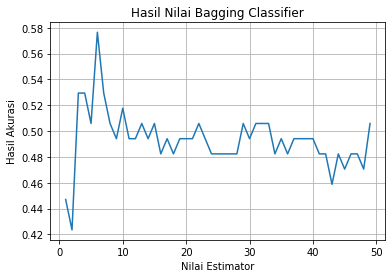

In [ ]:
import matplotlib.pyplot as plt

plt.plot(base_classifier, hasilNilai_classifier)
plt.title('Hasil Nilai Bagging Classifier')
plt.xlabel('Nilai Estimator')
plt.ylabel('Hasil Akurasi')
plt.grid(True)
plt.show()

## **Stacking Classification**
Stacking merupakan cara untuk mengkombinasi beberapa model, dengan konsep meta learner. dipakai setelah bagging dan boosting. tidak seperti bagging dan boosting, stacking memungkinkan mengkombinasikan model dari tipe yang berbeda. Ide dasarnya adalah untuk train learner tingkat pertama menggunakan kumpulan data training asli, dan kemudian menghasilkan kumpulan data baru untuk melatih learner tingkat kedua, di mana output dari learner tingkat pertama dianggap sebagai fitur masukan sementara yang asli label masih dianggap sebagai label data training baru. Pembelajar tingkat pertama sering dihasilkan dengan menerapkan algoritma learning yang berbeda.

Dalam fase training pada stacking, satu set data baru perlu dihasilkan dari classifier tingkat pertama. Jika data yang tepat yang digunakan untuk melatih classifier tingkat pertama juga digunakan untuk menghasilkan kumpulan data baru untuk melatih classifier tingkat kedua. proses tersebut memiliki risiko yang tinggi yang akan mengakibatkan overfitting. sehingga disarankan bahwa contoh yang digunakan untuk menghasilkan kumpulan data baru dikeluarkan dari contoh data training untuk learner tingkat pertama, dan prosedur crossvalidasi.<br>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/de/Stacking.png"></center><center>Gambar Stacking</center><br>
Berikut source code untuk melakukan klasisikasi dengan algoritma Stackingt Classifikcaion menggunakan library scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, random_state=42),'rf1', RandomForestClassifier(n_estimators=20, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier()
)

clf.fit(X_train, y_train).score(X_test, y_test)

0.8

## **Random Forest Classification**
Random forest (RF) adalah suatu algoritma yang digunakan pada klasifikasi data dalam jumlah yang besar. Klasifikasi random forest dilakukan melalui penggabungan pohon (tree) dengan melakukan training pada sampel data yang dimiliki. Penggunaan pohon (tree) yang semakin banyak akan mempengaruhi akurasi yang akan didapatkan menjadi lebih baik. Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk. Pemenang dari tree yang terbentuk ditentukan dengan vote terbanyak. Pembangunan pohon (tree) pada random forest sampai dengan mencapai ukuran maksimum dari pohon data. Akan tetapi,pembangunan pohon random forest tidak dilakukan pemangkasan (pruning) yang merupakan sebuah metode untuk mengurangi kompleksitas ruang. Pembangunan dilakukan dengan penerapan metode random feature selection untuk meminimalisir kesalahan. Pembentukan pohon (tree) dengan sample data menggunakan variable yang diambil secara acak dan menjalankan klasifikasi pada semua tree yang terbentuk. Random forest menggunakan Decision Tree untuk melakukan proses seleksi. Pohon yang dibangun dibagi secara rekursif dari data pada kelas yang sama. Pemecahan (split) digunakan untuk membagi data berdasarkan jenis atribut yang digunakan. Pembuatan decision tree pada saat penentuan klasifikasi,pohon yang buruk akan membuat prediksi acak yang saling bertentangan. Sehingga,beberapa decision tree akan menghasilkan jawaban yang baik. Random forest merupakan salah satu cara penerapan dari pendekatan diskriminasi stokastik pada klasifikasi. Proses Klasifikasi akan berjalan jika semua tree telah terbentuk.Pada saat proses klasifikasi selesai dilakukan, inisialisasi dilakukan dengan sebanyak data berdasarkan nilai akurasinya. Keuntungan penggunaan random forest yaitu mampu mengklasifiksi data yang memiliki atribut yang tidak lengkap,dapat digunakan untuk klasifikasi dan regresi akan tetapi tidak terlalu bagus untuk regresi, lebih cocok untuk pengklasifikasian data serta dapat digunakan untuk menangani data sampel yang banyak. Proses klasifikasi pada random forest berawal dari memecah data sampel yang ada kedalam decision tree secara acak. Setelah pohon terbentuk,maka akan dilakukan voting pada setiap kelas dari data sampel. Kemudian, mengkombinasikan vote dari setiap kelas kemudian diambil vote yang paling banyak.Dengan menggunakan random forest pada klasifikasi data maka, akan menghasilkan vote yang paling baik.<br>
<center><img src='https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png'></center><center>Gambar Random Forest</center><br>
Berikut source code untuk melakukan klasisikasi dengan algoritma Random Forest Classifikcaion menggunakan library scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


## **Grid Search**
Grid Search adalah sebuah function yang terdapat pada library Scikit-Learn. Function ini dapat membantu untuk mengulang melalui hyperparameter yang telah ditentukan dan menyesuaikan estimator (model) Anda pada data set pelatihan. Pada kali ini saya akan menggunakan Grid Search untuk membantu menemukan nilai estimator atau nilai yang terbaik sehingga nilai dari base classifier mendapatkan hasil akurasi yang terbaik pada metode Bagging dan Random Forest Classification.

### Bagging Classification dengan menggunakan Grid Search
Penggunaan Grid Search pada metode Bagging Classification untuk menemukan nilai estimator terbaik sehingga menghasilkan akurasi yang terbaik dapat dilakukan sebagai berikut.

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'base_estimator__max_depth' : [4, 8, 12, 16, 20]
}

X = X_train
Y = y_train

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
                                     n_estimators = 50, max_features = 0.5), param_grid)
 
results = model_selection.cross_val_score(clf, X, Y)
print("accuracy :")
print(results.mean())

accuracy :
0.5058823529411764


### Random Forest Classification dengan menggunakan Grid Search
Penggunaan Grid Search pada metode Random Forest Classification untuk menemukan nilai estimator terbaik sehingga menghasilkan akurasi yang terbaik dapat dilakukan sebagai berikut.

In [ ]:
from sklearn.model_selection import GridSearchCV

hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [3, 5, 7, 11, 15],
                'min_samples_leaf': [20, 50, 100, 200, 400],
                'n_estimators': [10, 25, 50, 80, 100]
                }

In [ ]:
#Grid search
model_cv = GridSearchCV(estimator=RandomForestClassifier(),
                        param_grid=hyper_params,
                        verbose=1,
                        cv=5,
                        n_jobs=1,
                        return_train_score=True)


In [ ]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [ ]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [ ]:
model_cv.best_score_

0.48235294117647054

In [ ]:
model_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=20,
                       n_estimators=50)

In [ ]:
#Pengimplementasian best estimator hasil dari GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=20,
                       n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4666666666666667


## **Kesimpulan**
Berdasar dari hasil atau nilai akurasi yang di dapat dari semua metode ensemble learning, metode Stacking Classification menghasilkan nilai akurasi yang paling baik dengan nilai akurasi sebesar 80% dibandingkan dengan metode Random Forest Classification sebesar 66% dan metode Bagging Classification sebesar 57%. Dan dari hasil akurasi yang diperoleh dari metode Bagging dan Random Forest Classification dengan menggunakan Grid Search memperoleh hasil atau nilai akurasi yang lebih buruk dibandingkan tanpa menggunakan Grid Search.<br>

Sehingga dapat disimpulkan bahwa penggunaan Grid Searh pada metode Bagging dan Random Forest Classification pada data Twitteer dengan pencarian '#rockygerung' menunjukkan bahwa penggunaan Grid Searh tidak dapat meningkatkan nilai akurasi yang diperoleh, akan tetapi membuat nilai akurasi yang di dapat semakin buruk. Oleh karena itu penggunaan Grid Search pada metode Bagging dan Random Forest Classification tidak begitu berpengaruh terhadap peningkatan akurasi yang diperoleh.